# Applying Different regressions of Customer Churn Telco Data
## Author: Hristo Panov

## 00 Prerequisite and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

# Custom Imports
import sys
sys.path.insert(0, '..')

from utils.const_folders import folder_paths
from utils.function_freqs import freqs

%matplotlib inline

## 01 Read Data

In [2]:
# Read From CSV
df = pd.read_csv(
    f"{folder_paths.path}/data_preprocessed.csv"
    ,sep=","
    ,index_col=None
)

## 02 Basic Checks

In [3]:
# Columns and Rows
print('The dataset contains {one} rows and {two} columns'.format(one=df.shape[0],two=df.shape[1]))
print('Those columns are {one}'.format(one=df.columns.to_list()))

The dataset contains 7043 rows and 61 columns
Those columns are ['customerID', 'GB_FLAG', 'GENDER_FEMALE', 'GENDER_MALE', 'SENIORCITIZEN_NO', 'SENIORCITIZEN_YES', 'PARTNER_NO', 'PARTNER_YES', 'DEPENDENTS_NO', 'DEPENDENTS_YES', 'PHONESERVICE_NO', 'PHONESERVICE_YES', 'MULTIPLELINES_NO', 'MULTIPLELINES_NO_PHONE_SERVICE', 'MULTIPLELINES_YES', 'INTERNETSERVICE_DSL', 'INTERNETSERVICE_FIBER_OPTIC', 'INTERNETSERVICE_NO', 'ONLINESECURITY_NO', 'ONLINESECURITY_NO_INTERNET_SERVICE', 'ONLINESECURITY_YES', 'ONLINEBACKUP_NO', 'ONLINEBACKUP_NO_INTERNET_SERVICE', 'ONLINEBACKUP_YES', 'DEVICEPROTECTION_NO', 'DEVICEPROTECTION_NO_INTERNET_SERVICE', 'DEVICEPROTECTION_YES', 'TECHSUPPORT_NO', 'TECHSUPPORT_NO_INTERNET_SERVICE', 'TECHSUPPORT_YES', 'STREAMINGTV_NO', 'STREAMINGTV_NO_INTERNET_SERVICE', 'STREAMINGTV_YES', 'STREAMINGMOVIES_NO', 'STREAMINGMOVIES_NO_INTERNET_SERVICE', 'STREAMINGMOVIES_YES', 'CONTRACT_MONTH_TO_MONTH', 'CONTRACT_ONE_YEAR', 'CONTRACT_TWO_YEAR', 'PAPERLESSBILLING_NO', 'PAPERLESSBILLING_YE

In [4]:
# Preview
df.sample(5)

,customerID,GB_FLAG,GENDER_FEMALE,GENDER_MALE,SENIORCITIZEN_NO,SENIORCITIZEN_YES,PARTNER_NO,PARTNER_YES,DEPENDENTS_NO,DEPENDENTS_YES,...,TOTALCHARGES_0_260,TOTALCHARGES_261_950,TOTALCHARGES_951_2500,TOTALCHARGES_2501_4500,TOTALCHARGES_4501_high,MONTHLYCHARGES_0_25,MONTHLYCHARGES_26_58,MONTHLYCHARGES_59_80,MONTHLYCHARGES_81_95,MONTHLYCHARGES_96_high
2083,4897-QSUYC,0,1,0,1,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
6069,8097-OMULG,1,0,1,1,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
6190,2867-UIMSS,0,0,1,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4029,0019-GFNTW,1,1,0,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2225,1153-GNOLC,1,0,1,1,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [6]:
#Set the index of the data set to be equal to the customerID
df.set_index('customerID',inplace=True)

In [7]:
#Explore Feature types
df.dtypes

GB_FLAG                                  int64
GENDER_FEMALE                            int64
GENDER_MALE                              int64
SENIORCITIZEN_NO                         int64
SENIORCITIZEN_YES                        int64
PARTNER_NO                               int64
PARTNER_YES                              int64
DEPENDENTS_NO                            int64
DEPENDENTS_YES                           int64
PHONESERVICE_NO                          int64
PHONESERVICE_YES                         int64
MULTIPLELINES_NO                         int64
MULTIPLELINES_NO_PHONE_SERVICE           int64
MULTIPLELINES_YES                        int64
INTERNETSERVICE_DSL                      int64
INTERNETSERVICE_FIBER_OPTIC              int64
INTERNETSERVICE_NO                       int64
ONLINESECURITY_NO                        int64
ONLINESECURITY_NO_INTERNET_SERVICE       int64
ONLINESECURITY_YES                       int64
ONLINEBACKUP_NO                          int64
ONLINEBACKUP_

In [8]:
#Set the dependant variable
dependant_flag = "GB_FLAG"

In [9]:
telco_data_features = df.drop([dependant_flag], axis = 1)
telco_data_target = df[dependant_flag]

## 03 Train Test Split

In [10]:
features_train, features_test, target_train, target_test = train_test_split(
    telco_data_features, telco_data_target, train_size = 0.7, test_size = 0.3, random_state = 42)
print(features_train.shape, features_test.shape, target_train.shape, target_test.shape, sep = "\r\n")

(4930, 59)
(2113, 59)
(4930,)
(2113,)


## 05.1 Logistic Regression sklearn

In [27]:
model = LogisticRegression()
model.fit(features_train, target_train)

c:\Users\hpano\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
print('coefficient : {one} \n\n Intercet : {two}'.format(one = model.coef_, two = model.intercept_))

coefficient : [[-0.03481583  0.03261156  0.10949387 -0.11169814  0.02582066 -0.02802493
  -0.04709996  0.04489569 -0.04757768  0.04537341  0.21136756 -0.04757768
  -0.16599414  0.47626956 -0.6371418   0.15866797 -0.25399677  0.15866797
   0.09312452 -0.15213948  0.15866797 -0.00873276 -0.05298077  0.15866797
  -0.10789147 -0.179315    0.15866797  0.01844275  0.00653795  0.15866797
  -0.16741019  0.12288207  0.15866797 -0.28375432 -0.79168637 -0.1350184
   0.9245005   0.15829358 -0.16049785  0.01428399  0.07856434 -0.24404934
   0.14899674 -1.2020585  -0.46724963 -0.0485062   0.37399104  0.4265095
   0.91510952 -0.45667136 -0.19235474 -0.01047429  0.24875666  0.40853946
  -0.24869597 -0.11657466  0.12302217  0.26071738 -0.02067317]] 

 Intercet : [1.96537732]


In [29]:
score = model.score(features_test, target_test)
print(score)

0.8088026502602934


In [30]:
weights = pd.Series(model.coef_[0],
                 index=telco_data_features.columns.values)
weights

GENDER_FEMALE                           -0.034816
GENDER_MALE                              0.032612
SENIORCITIZEN_NO                         0.109494
SENIORCITIZEN_YES                       -0.111698
PARTNER_NO                               0.025821
PARTNER_YES                             -0.028025
DEPENDENTS_NO                           -0.047100
DEPENDENTS_YES                           0.044896
PHONESERVICE_NO                         -0.047578
PHONESERVICE_YES                         0.045373
MULTIPLELINES_NO                         0.211368
MULTIPLELINES_NO_PHONE_SERVICE          -0.047578
MULTIPLELINES_YES                       -0.165994
INTERNETSERVICE_DSL                      0.476270
INTERNETSERVICE_FIBER_OPTIC             -0.637142
INTERNETSERVICE_NO                       0.158668
ONLINESECURITY_NO                       -0.253997
ONLINESECURITY_NO_INTERNET_SERVICE       0.158668
ONLINESECURITY_YES                       0.093125
ONLINEBACKUP_NO                         -0.152139


In [31]:
conf_matrix = round(pd.DataFrame(metrics.confusion_matrix(target_test, model.predict(features_test))/len(target_test))*100,4)
conf_matrix

,0,1
0,14.7184,12.4468
1,6.6730,66.1619


In [32]:
feature_name = features_train.columns.values

In [33]:
# Get summary out of the regression
summary_table = pd.DataFrame(columns=["Feature name"], data=feature_name)
summary_table["Coefficients"] = np.transpose(model.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ["Intercept", model.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,1.965377
1,GENDER_FEMALE,-0.034816
2,GENDER_MALE,0.032612
3,SENIORCITIZEN_NO,0.109494
4,SENIORCITIZEN_YES,-0.111698
5,PARTNER_NO,0.025821
6,PARTNER_YES,-0.028025
7,DEPENDENTS_NO,-0.047100
8,DEPENDENTS_YES,0.044896
9,PHONESERVICE_NO,-0.047578


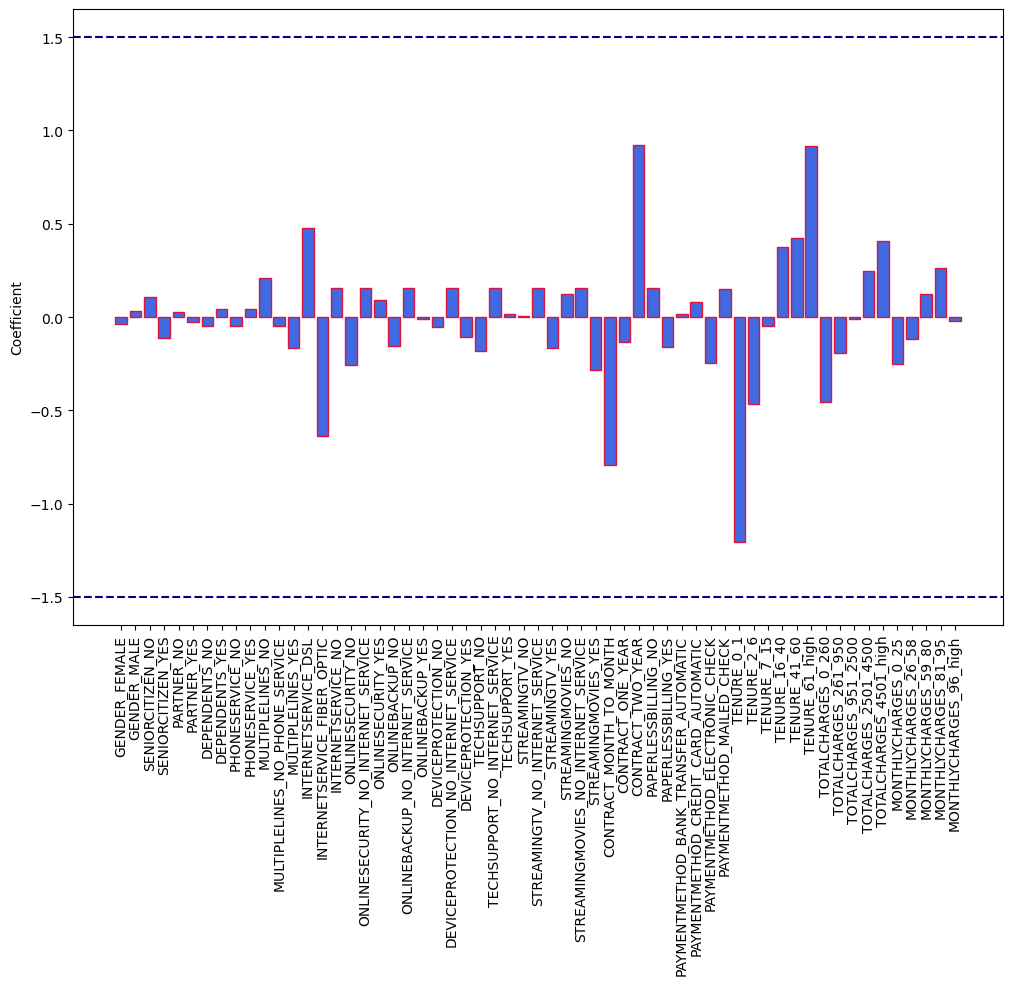

In [35]:
# Plot the Regression Coefficient
plt.figure(figsize=(12,8))
plt.bar(x="Feature name", height='Coefficients',color='royalblue',
        data=summary_table[summary_table['Feature name']!='Intercept'],edgecolor='crimson',capsize = 0,orientation ='vertical')
plt.axhline(y=1.5, color='navy', linestyle='--')
plt.axhline(y=-1.5, color='navy', linestyle='--')
plt.tick_params(axis='x', rotation=90)
plt.ylabel('Coefficient')
plt.show()

## 05.2 Logistic Regression Statsmodel

In [36]:
logit_model=sm.Logit(target_train,features_train)
model=logit_model.fit()
print(model.summary())

         Current function value: 0.408739
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                GB_FLAG   No. Observations:                 4930
Model:                          Logit   Df Residuals:                     4896
Method:                           MLE   Df Model:                           33
Date:                Sun, 05 May 2024   Pseudo R-squ.:                  0.2902
Time:                        00:57:09   Log-Likelihood:                -2015.1
converged:                      False   LL-Null:                       -2838.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
GENDER_FEMALE                             0.1106   5.93e+13   1.87e-15      1.000   -1.16e

c:\Users\hpano\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [37]:
model_predict=np.where(model.predict(features_test)<0.5,0,1)
model_predict.mean()

0.7865593942262187

In [38]:
cm = round(pd.DataFrame(metrics.confusion_matrix(target_test, model_predict)/len(target_test))*100,4)
cm

,0,1
0,14.6238,12.5414
1,6.7203,66.1145


In [39]:
def accuracy(pred_table):
    """
    Precision given pred_table. Binary classification only. Assumes group 0
    is the True.
    """
    tp, fp, fn, tn = map(float, pred_table.flatten())
    return (tp + tn) / (tp + tn + fp + fn)

In [40]:
accuracy(metrics.confusion_matrix(target_test, model_predict))

0.807382867960246

### 05.3 Linear Regression sklearn

In [45]:
model = LinearRegression()
model.fit(features_train, target_train)

LinearRegression()

In [46]:
print('coefficient : {one} \n\n Intercet : {two}'.format(one = model.coef_, two = model.intercept_))

coefficient : [-3.25216093e+08 -3.25216093e+08  8.70390902e+11  8.70390902e+11
  9.36583046e+11  9.36583046e+11 -1.22225386e+13 -1.22225386e+13
 -3.75051742e+12 -6.80310428e+11 -3.23846959e+12 -1.68262591e+11
 -3.23846959e+12 -1.37669267e+12 -1.37669267e+12 -9.43740443e+11
 -2.61738999e+12 -2.78259960e+12 -2.61738999e+12 -2.84919162e+12
 -1.40658456e+12 -2.84919162e+12 -1.86184103e+12  6.62110627e+11
 -1.86184103e+12  2.86842914e+12  5.10814831e+11  2.86842914e+12
 -1.68751793e+11 -4.52487218e+11 -1.68751793e+11  2.59519187e+12
  1.00224028e+12  2.59519187e+12 -3.66037432e+11 -3.66037432e+11
 -3.66037432e+11  1.83880210e+12  1.83880210e+12 -3.49565357e+11
 -3.49565357e+11 -3.49565357e+11 -3.49565357e+11 -1.36230826e+12
 -1.36230826e+12 -1.36230826e+12 -1.36230826e+12 -1.36230826e+12
 -1.36230826e+12  1.07915223e+12  1.07915223e+12  1.07915223e+12
  1.07915223e+12  1.07915223e+12  3.20887163e+11  3.20887163e+11
  3.20887163e+11  3.20887163e+11  3.20887163e+11] 

 Intercet : 165839855695

In [47]:
score = model.score(features_test, target_test)
print(score)

0.32485215034247095


In [48]:
weights = pd.Series(model.coef_[0],
                 index=telco_data_features.columns.values)
weights

GENDER_FEMALE                           -3.252161e+08
GENDER_MALE                             -3.252161e+08
SENIORCITIZEN_NO                        -3.252161e+08
SENIORCITIZEN_YES                       -3.252161e+08
PARTNER_NO                              -3.252161e+08
PARTNER_YES                             -3.252161e+08
DEPENDENTS_NO                           -3.252161e+08
DEPENDENTS_YES                          -3.252161e+08
PHONESERVICE_NO                         -3.252161e+08
PHONESERVICE_YES                        -3.252161e+08
MULTIPLELINES_NO                        -3.252161e+08
MULTIPLELINES_NO_PHONE_SERVICE          -3.252161e+08
MULTIPLELINES_YES                       -3.252161e+08
INTERNETSERVICE_DSL                     -3.252161e+08
INTERNETSERVICE_FIBER_OPTIC             -3.252161e+08
INTERNETSERVICE_NO                      -3.252161e+08
ONLINESECURITY_NO                       -3.252161e+08
ONLINESECURITY_NO_INTERNET_SERVICE      -3.252161e+08
ONLINESECURITY_YES          

In [52]:
# Get summary out of the regression
summary_table = pd.DataFrame(columns=["Feature name"], data=feature_name)
summary_table["Coefficients"] = np.transpose(model.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ["Intercept", model.intercept_]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,1.658399e+13
1,GENDER_FEMALE,-3.252161e+08
2,GENDER_MALE,-3.252161e+08
3,SENIORCITIZEN_NO,8.703909e+11
4,SENIORCITIZEN_YES,8.703909e+11
5,PARTNER_NO,9.365830e+11
6,PARTNER_YES,9.365830e+11
7,DEPENDENTS_NO,-1.222254e+13
8,DEPENDENTS_YES,-1.222254e+13
9,PHONESERVICE_NO,-3.750517e+12


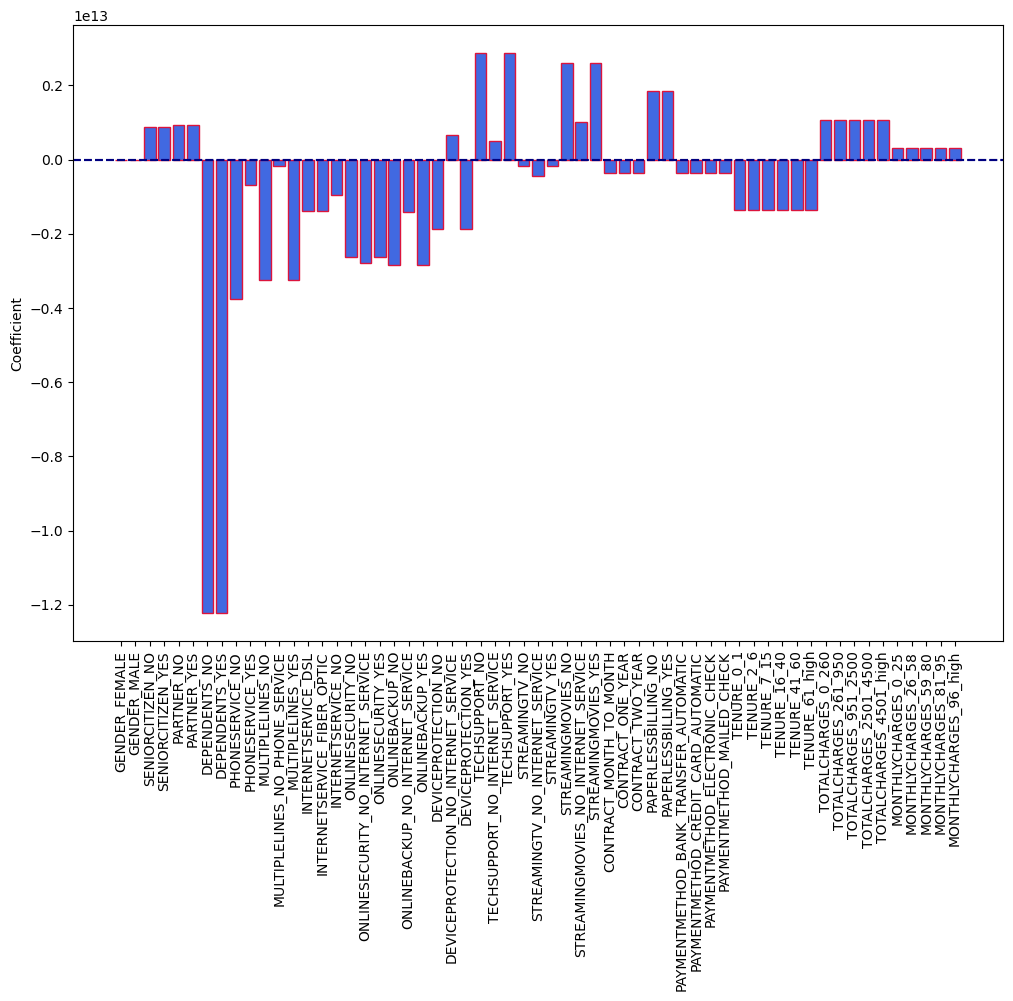

In [54]:
# Plot the Regression Coefficient
plt.figure(figsize=(12,8))
plt.bar(x="Feature name", height='Coefficients',color='royalblue',
        data=summary_table[summary_table['Feature name']!='Intercept'],edgecolor='crimson',capsize = 0,orientation ='vertical')
plt.axhline(y=1.5, color='navy', linestyle='--')
plt.axhline(y=-1.5, color='navy', linestyle='--')
plt.tick_params(axis='x', rotation=90)
plt.ylabel('Coefficient')
plt.show()